<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-Walkthrough/blob/master/Data_Cleaning_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Cleaning Walkthrough

## Introduction

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2). The first few rows of the SAT data look like this:



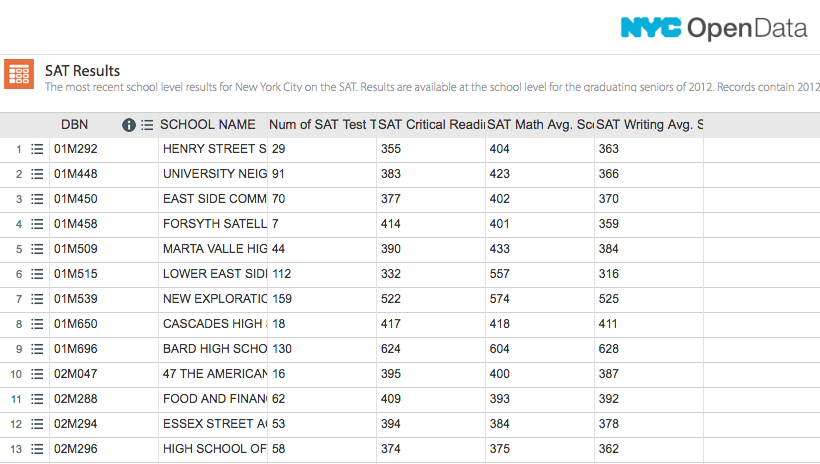

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* **SAT scores by school** - SAT scores for each high school in New York City
* **School attendance** - Attendance information for each school in New York City
* **Class size** - Information on class size for each school
* **AP test results** - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* **Graduation outcomes** - The percentage of students who graduated, and other outcome information
* Demographics - Demographic information for each school
* **School survey** - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

Only high school students take the SAT, so we'll want to focus on high schools.
New York City is made up of five boroughs, which are essentially distinct regions.
New York City schools fall within several different school districts, each of which can contains dozens of schools.
Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
Each school in New York City has a unique code called a DBN, or district borough number.
Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called a DBN, or district borough number.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

## Reading in the Data

In [2]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    df = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/{}'.format(file))
    file_name = file.split('.')[0]
    data[file_name] = df

data['ap_2010']


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN
...,...,...,...,...,...
253,31R605,STATEN ISLAND TECHNICAL HS,528.0,905.0,809.0
254,32K545,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,13.0
255,32K552,Academy of Urban Planning,76.0,100.0,10.0
256,32K554,All City Leadership Secondary School,7.0,8.0,NaN


## Exploring the SAT Data

In [3]:
# Exploring the SAT_results dataset
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

* The DBN appears to be a unique ID for each school.
* We can tell from the first few rows of names that we only have data about high schools.
* There's only a single row for each high school, so each DBN is unique in the SAT data.
* We may eventually want to combine the three columns that contain ***SAT scores -- SAT Critical Reading Avg. Score***, ***SAT Math Avg. Score***, and ***SAT Writing Avg. Score*** -- into a single column to make the scores easier to analyze.

## Exploring the Remaining Data

In [4]:
for key in data:
    print(key)
    print(data[key].head())
    print(data[key].columns)
    print('\n')

ap_2010
      DBN  ... Number of Exams with scores 3 4 or 5
0  01M448  ...                                 10.0
1  01M450  ...                                  NaN
2  01M515  ...                                 24.0
3  01M539  ...                                191.0
4  02M296  ...                                  NaN

[5 rows x 5 columns]
Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')


class_size
   CSD BOROUGH  ... DATA SOURCE SCHOOLWIDE PUPIL-TEACHER RATIO
0    1       M  ...         ATS                            NaN
1    1       M  ...         ATS                            NaN
2    1       M  ...         ATS                            NaN
3    1       M  ...         ATS                            NaN
4    1       M  ...         ATS                            NaN

[5 rows x 16 columns]
Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS 

**TAKE A LOOK**

We can make some observations based on the first few rows of each one.

* Each data set appears to either have a **DBN** column, or the information we need to create one. That means we can use a **DBN** column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical **DBNs**, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly **Location 1**, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate **DBN** values). That means we’ll have to do some preprocessing to ensure that each **DBN** is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

## Reading in the Survey Data


In [5]:
all_survey = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/all_survey.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning Walkthrough/survey_d75.txt', delimiter='\t', encoding='windows-1252')

all_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,...,s_N_q13e_1,s_N_q13e_2,s_N_q13e_3,s_N_q13e_4,s_N_q13f_1,s_N_q13f_2,s_N_q13f_3,s_N_q13f_4,s_N_q13g_1,s_N_q13g_2,s_N_q13g_3,s_N_q13g_4,s_N_q14a_1,s_N_q14a_2,s_N_q14a_3,s_N_q14a_4,s_N_q14b_1,s_N_q14b_2,s_N_q14b_3,s_N_q14b_4,s_N_q14c_1,s_N_q14c_2,s_N_q14c_3,s_N_q14c_4,s_N_q14d_1,s_N_q14d_2,s_N_q14d_3,s_N_q14d_4,s_N_q14e_1,s_N_q14e_2,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,...,76.0,35.0,14.0,17.0,100.0,30.0,6.0,4.0,89.0,28.0,9.0,12.0,32.0,68.0,21.0,16.0,23.0,60.0,32.0,25.0,43.0,66.0,19.0,12.0,39.0,68.0,18.0,16.0,35.0,70.0,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q1c,p_q10a,p_q10b,p_q10c,p_q10d,p_q10e,p_q10f,p_q11a,...,s_q12g_4,s_q13a_1,s_q13a_2,s_q13a_3,s_q13a_4,s_q13b_1,s_q13b_2,s_q13b_3,s_q13b_4,s_q13c_1,s_q13c_2,s_q13c_3,s_q13c_4,s_q13d_1,s_q13d_2,s_q13d_3,s_q13d_4,s_q13e_1,s_q13e_2,s_q13e_3,s_q13e_4,s_q13f_1,s_q13f_2,s_q13f_3,s_q13f_4,s_q13g_1,s_q13g_2,s_q13g_3,s_q13g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,8.0,81,244,21,90,337,9.1,8.6,8.4,8.5,7.4,6.6,6.4,6.4,7.6,5.8,7.6,6.3,8.0,7.0,7.5,7.1,8.7,9.0,9.0,8.9,8.8,8.9,8.9,7.3,...,0.0,0.0,100.0,0.0,0.0,14.0,86.0,0.0,0.0,14.0,86.0,0.0,0.0,0.0,86.0,14.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,71.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,97.0,43,115,139,62,263,9.2,8.7,8.6,8.8,6.9,7.1,6.1,7.2,6.6,6.9,7.3,7.7,7.5,7.6,7.3,7.9,8.8,9.3,9.2,9.0,9.1,9.3,9.2,7.6,...,10.0,46.0,43.0,7.0,4.0,42.0,39.0,17.0,2.0,52.0,39.0,4.0,4.0,41.0,40.0,12.0,7.0,42.0,31.0,19.0,8.0,37.0,38.0,12.0,12.0,35.0,47.0,10.0,8.0,13.0,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,131.0,75,189,139,77,355,8.8,8.1,8.0,8.1,7.8,7.5,6.9,8.0,8.2,7.7,8.6,8.5,8.2,7.8,7.8,8.2,8.3,8.6,8.8,8.4,8.6,8.7,8.4,7.3,...,1.0,52.0,39.0,8.0,1.0,53.0,40.0,5.0,2.0,70.0,26.0,4.0,0.0,66.0,29.0,4.0,1.0,63.0,35.0,2.0,0.0,50.0,33.0,13.0,4.0,58.0,41.0,1.0,1.0,5.0,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,70.0,52,150,74,80,274,9.4,8.7,8.8,8.9,7.1,6.2,6.4,6.3,8.6,8.3,8.6,8.8,8.3,7.7,7.9,8.0,8.8,9.2,9.2,9.1,9.1,9.1,8.9,9.5,...,3.0,54.0,43.0,1.0,1.0,55.0,36.0,7.0,1.0,59.0,38.0,1.0,1.0,57.0,35.0,4.0,4.0,61.0,36.0,1.0,1.0,56.0,34.0,7.0,3.0,64.0,33.0,1.0,1.0,3.0,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,69.0,45,117,90,64,277,8.6,8.2,7.9,8.3,5.6,5.8,5.1,6.0,4.7,6.1,6.0,7.3,6.3,6.7,6.3,7.2,8.8,8.6,8.8,8.4,8.4,8.5,8.6,6.4,...,34.0,18.0,62.0,5.0,15.0,23.0,27.0,17.0,33.0,34.0,25.0,31.0,11.0,17.0,14.0,42.0,28.0,18.0,11.0,34.0,37.0,6.0,22.0,25.0,48.0,19.0,25.0,22.0,34.0,12.0,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Combine d75_survey and all_survey into a single dataframe
survey = pd.concat([all_survey,d75_survey], axis=0)

survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,...,s_q10_4,s_q11a_1,s_q11a_2,s_q11a_3,s_q11a_4,s_q11b_1,s_q11b_2,s_q11b_3,s_q11b_4,s_q11c_1,s_q11c_2,s_q11c_3,s_q11c_4,s_q12d_1,s_q12d_2,s_q12d_3,s_q12d_4,s_q12e_1,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can see in the data:

* There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
* The survey data has a **dbn** column that we'll want to convert to uppercase (**DBN**). The conversion will make the column name consistent with the other data sets.

## Cleaning Up the Surveys

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://drive.google.com/file/d/1LFi3x3-Pw0RsLsMrTdXuLEQTRQtPBm6F/view?usp=sharing). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

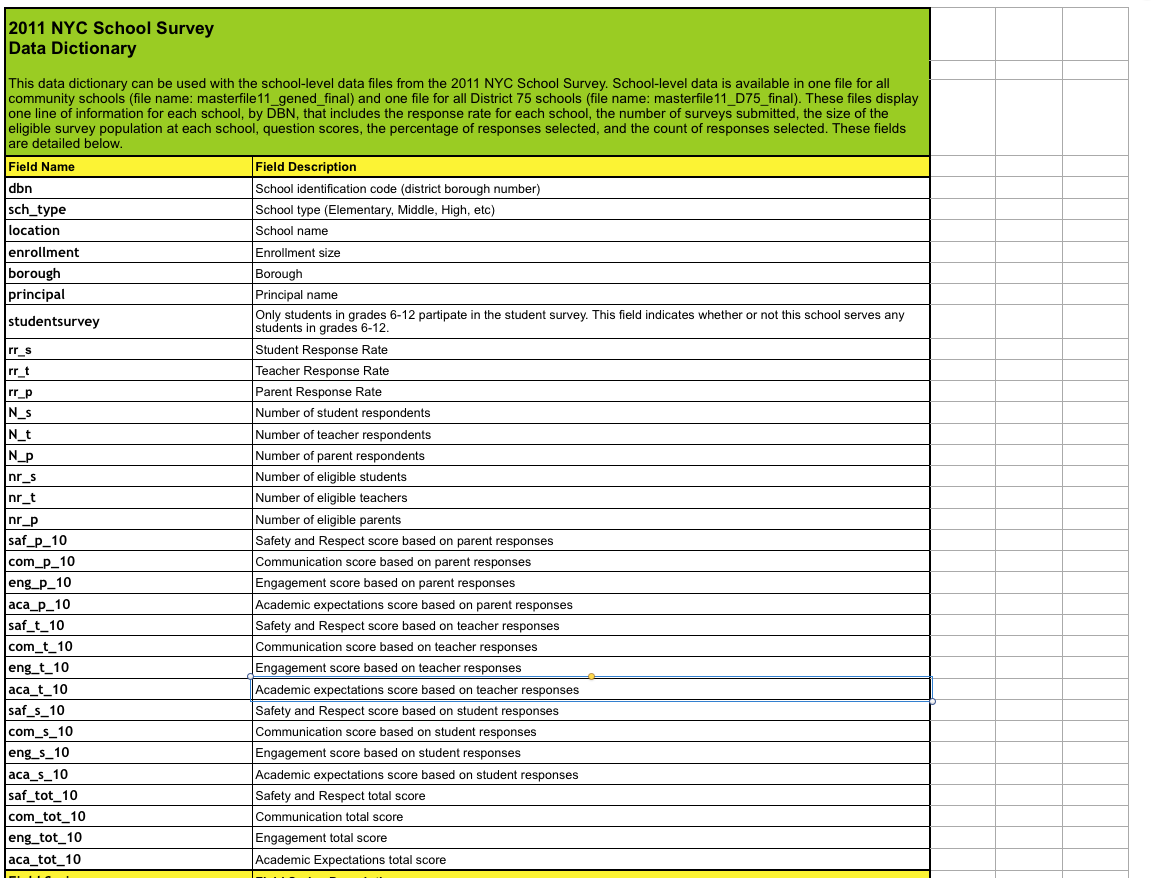

Based on the dictionary, it looks like these are the relevant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [8]:
# Copy the data from the dbn column of survey into the new column in survey called DBN
survey['DBN'] = survey['dbn']

In [9]:
list_columns = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
# Filter survey so it only contains the columns we listed above 
survey = survey[list_columns]

# Assign df survey to th key survey in the dict data
data['survey'] = survey

data['survey']

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,8.2,6.4,5.5,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,7.7,7.6,6.4,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,7.8,7.7,7.2,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,7.8,6.7,6.5,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


## Inserting DBN fields

When we explored all of the data sets, we noticed that some of them, like **class_size** and **hs_directory**, don't have a DBN column. **hs_directory** does have a dbn column, though, so we can just rename it.

In [10]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


Here are the first few rows of the **sat_results** data, which does have a **DBN** column:



In [11]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From looking at these rows, we can tell that the **DBN** in the **sat_results** data is just a combination of the **CSD** and **SCHOOL CODE** columns in the **class_size** data. The main difference is that the **DBN** is padded, so that the **CSD** portion of it always consists of two digits. That means we'll need to add a leading **0** to the **CSD** if the **CSD** is less than two digits long. Here's a diagram illustrating what we need to do:

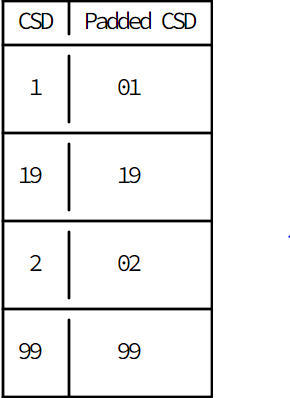

And here's a diagram illustrating the basic concept:


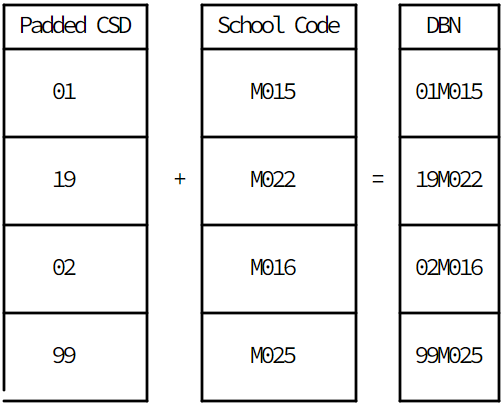

In [12]:
# class_size dataset => data['class_size']

# Create padded_csd column in the class_size dataset
data['class_size']['padded_csd'] = data['class_size']['CSD'].astype('str').str.zfill(2)

# Create DBN column in the class_size dataset
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

# check new column DBN
data['class_size']['DBN']

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: DBN, Length: 27611, dtype: object

In [13]:
# copy the column dbn to the new column DBN

data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# check new column DBN
data['hs_directory']['DBN']

0      27Q260
1      21K559
2      16K393
3      08X305
4      03M485
        ...  
430    02M300
431    09X412
432    32K549
433    02M407
434    21K344
Name: DBN, Length: 435, dtype: object

### Combining the SAT Scores 

In [14]:
# list columns name need to convert 
list_columns = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'] 
# Convert data of columns to numeric
for l in list_columns:
    data['sat_results'][l] = pd.to_numeric(data['sat_results'][l], errors='coerce')


# combine data from 3 columns into 1 new column sat_results
data['sat_results']['sat_score'] = data['sat_results'][list_columns].sum(axis=1)

data['sat_results']['sat_score']

0      1122.0
1      1172.0
2      1149.0
3      1174.0
4      1207.0
        ...  
473       0.0
474       0.0
475       0.0
476    1322.0
477    1097.0
Name: sat_score, Length: 478, dtype: float64

## Parsing Geographic Coordinates for Schools

we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field **Location 1** in the **hs_directory** data set.

In [15]:
data['hs_directory']['Location 1']

0      8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...
1      2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...
2      1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...
3      1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...
4      100 Amsterdam Avenue\nNew York, NY 10023\n(40....
                             ...                        
430    525 West 50Th Street\nNew York, NY 10019\n(40....
431    240 East 172 Street\nBronx, NY 10457\n(40.8403...
432    400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...
433    345 East 15Th Street\nNew York, NY 10003\n(40....
434    521 West Avenue\nBrooklyn, NY 11224\n(40.58211...
Name: Location 1, Length: 435, dtype: object

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

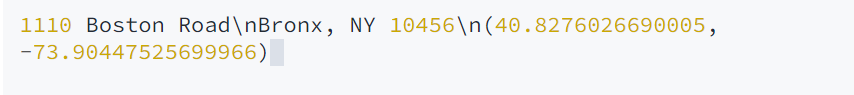

We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

In [16]:
import re
# Example
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")


['(40.8276026690005, -73.90447525699966)']

In [17]:
# Write func to find latitude
def find_lat(loc):
    coords = re.findall('\(.+\)', loc)
    lat = coords[0].split(',')[0].replace('(','')
    return lat

# Create new column latitude
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat) 

data['hs_directory']['lat']

0      40.601989336
1      40.593593811
2      40.692133704
3      40.822303765
4      40.773670507
           ...     
430    40.765026708
431    40.840373398
432    40.696961848
433    40.732485378
434     40.58211615
Name: lat, Length: 435, dtype: object

In [18]:
# Write func to find longitude
def find_lon(loc):
    coords = re.findall('\(.+\)', loc)
    lon = coords[0].split(',')[1].replace(')','')
    return lon

# Create new column longitude
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_lon)

data['hs_directory']['lon']

0       -73.762834323
1       -73.984729232
2       -73.931503172
3        -73.85596139
4       -73.985268558
            ...      
430     -73.992516578
431     -73.910838008
432     -73.910815939
433     -73.983053388
434     -73.972894492
Name: lon, Length: 435, dtype: object

In [19]:
# Convert 2 columns lat, loc to number dtype
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
